### Herbert Rafael Reyes Portillo
### Carnet: 23002116

# Laboratorio 3

### Parte 1: Numpy:

Para los ejercicios siguiente genere el código que considere
para resolver el problema que se le plantea.

1. ¿Cuál es el tamaño en bytes de un array de 1000 elementos de tipo booleano?

In [2]:

import numpy as np

arreglo = np.zeros(1000, dtype=bool)
size = arreglo.size * arreglo.itemsize
print("El tamaño del array en bytes es:", size)

El tamaño del array en bytes es: 1000


2. Cree un array cuyos elementos sean los enteros pares en [1,100] y en orden decreciente. Muestre los 10 últimos por pantalla.

In [3]:
arreglo = np.arange(100,0,-2)
print(arreglo[-10:])

[20 18 16 14 12 10  8  6  4  2]


3) Dado el array

2 4 5 6

0 3 7 4

8 8 5 2

1 5 6 1

Seleccione con una instrucción el subarray de elementos

0 3 7 4

Después, seleccione el subarray de elementos

2 5

8 5

In [4]:
matriz = np.array([[2, 4, 5, 6],
                   [0, 3, 7, 4],
                   [8, 8, 5, 2],
                   [1, 5, 6, 1]])

print(matriz[1,:])
print(matriz[0::2,0::2])

[0 3 7 4]
[[2 5]
 [8 5]]


4. Dados los arrays a = [1, 4, 2, 7] y b = [1, 3, 2, 9],
obtenga la media aritmética de la diferencia (a-b).

In [5]:
a = np.array([1, 4, 2, 7])
b = np.array([1, 3, 2, 9])

diferencia=a-b
media = np.mean(diferencia)
print(media)

-0.25


5. Tengo valores de cordenadas (x, y) en las columnas del array
1.33 4.5
30.0 10.7
70.2 0.5

Agregue a este array las coordenadas (37.1, -3.6). Muestre en pantalla las dimensiones del nuevo array.

In [6]:
array_cord = np.array([[1.33, 4.5],
                   [30.0, 10.7],
                   [70.2, 0.5]])

array_cord = np.vstack([array_cord,np.array([37.1,-3.6])])

print(f"Las nuevas dimensiones son: {array_cord.shape}")

Las nuevas dimensiones son: (4, 2)


6. Copie el array del ejercicio anterior. Traspóngalo (.Agregue ahora dos nuevos pares de coordenadas: (10.8,3.0) y (35.8, 12.0).

In [7]:
copy = np.copy(array_cord)
copy_t= copy.T


nuevas =     np.array([[10.8, 3.0],
                       [35.8, 12.0]])

copy_t = np.hstack([copy_t,nuevas])

print(f"Las nuevas dimensiones son: {copy_t.shape}")

Las nuevas dimensiones son: (2, 6)


## Parte 2: Exploración y Minería de Datos:
Con el dataset nucleospoblacion.csv adjunto al laboratorio,
luego responda las siguientes preguntas usando pandas y
matplotlib.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./Files/NucleosPoblacion.csv', delimiter=',', header=0)
df

,FID,OBJECTID,Texto,Poblacion,CodMun,Municipio,CodProvin,Provincia,X,Y
0,0,1,Agüimes,29431.0,35002,Agüimes,35,Las Palmas,-15.446012,27.900542
1,1,2,Antigua,10458.0,35003,Antigua,35,Las Palmas,-14.013301,28.418966
2,2,3,Arrecife,58156.0,35004,Arrecife,35,Las Palmas,-13.551451,28.960649
3,3,4,Arucas,36745.0,35006,Arucas,35,Las Palmas,-15.521512,28.117496
4,4,5,Gáldar,24473.0,35009,Gáldar,35,Las Palmas,-15.654111,28.143873
...,...,...,...,...,...,...,...,...,...,...
847,847,848,Infante Juan Manuel,14192.0,30030,Murcia,30,Murcia,-1.124304,37.979033
848,848,849,Santa Maria de Gracia,13349.0,30030,Murcia,30,Murcia,-1.202069,37.984024
849,849,850,Vista Alegre,15208.0,30030,Murcia,30,Murcia,-1.130564,37.995715
850,850,851,Poligono Sta M de Benquerencia,19177.0,45168,Toledo,45,Toledo,-3.948364,39.866699


1. ¿Cuántos Municipios tienen más de 100000 habitantes?.

In [9]:
Municipios=df.loc[df['Poblacion'] > 100000, 'Municipio'].count()

print(f"La cantidad de municipios con mas de 100000 es de: {Municipios}")

La cantidad de municipios con mas de 100000 es de: 62


2. Realice una gráfica de barras sobre la polbación de cada ciudad, ordenela de menor a mayo y responda:
- a. ¿Cuál es la segunda ciudad más poblada?
- b. ¿Qué posición ocupa Granada en el ranking de las ciudades más pobladas?

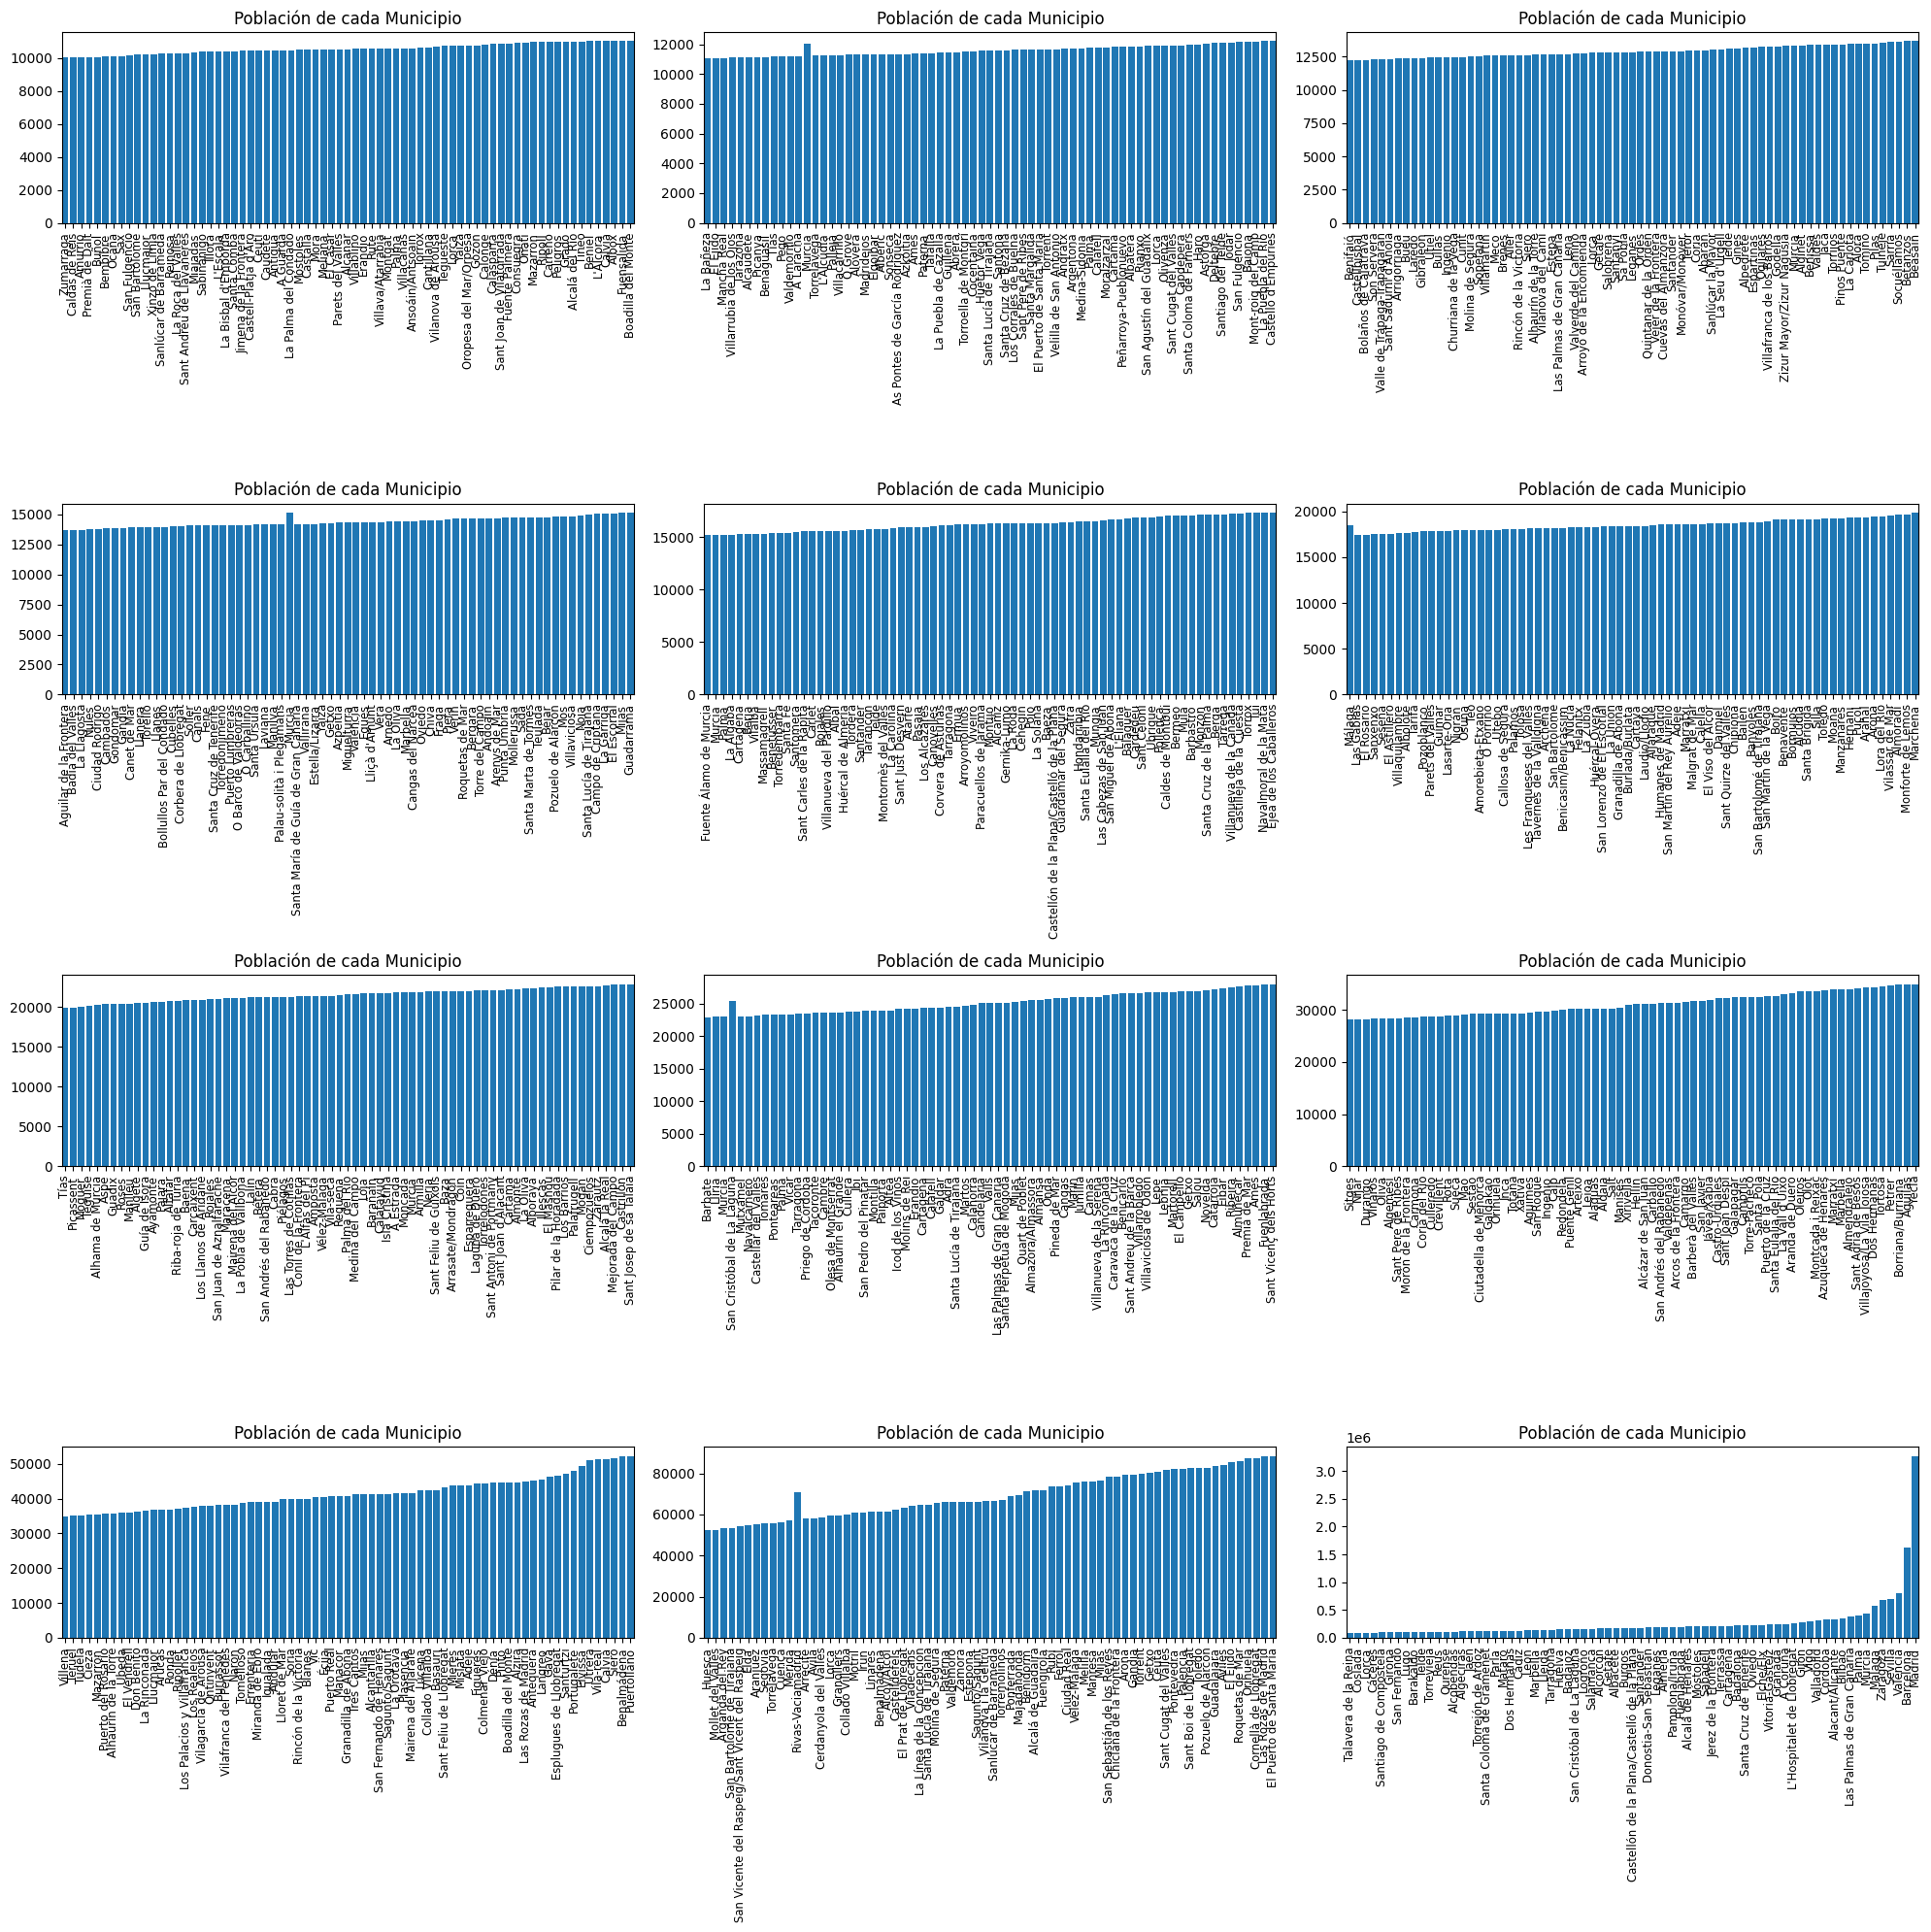

La segunda ciudad mas poblada es Barcelona
Granada ocupada la posicion 272 de las ciudades mas pobladas


In [28]:
df_ordenado = df.sort_values(by='Poblacion',ascending=True)
n = 71
num_graficas = len(df)// n
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 20))
for i, ax in enumerate(axes.flatten()):
    if i < len(df) // n + 1:
        subset = df_ordenado.iloc[i*n:(i+1)*n]
        ax.bar(subset['Municipio'],subset['Poblacion'])
        ax.set_title('Población de cada Municipio')
        ax.autoscale(enable=True, axis='x', tight=True)
        ax.tick_params(axis='x', labelrotation=90, labelsize='small')
fig.tight_layout()
plt.show()

print("La segunda ciudad mas poblada es Barcelona")
print("Granada ocupada la posicion 272 de las ciudades mas pobladas")

3. ¿Cuántos municipios de Extremadura tienen más de 5000 habitantes?.

In [44]:
df.loc[(df['Poblacion'] > 5000) & (df['Provincia']=='Extremadura')].groupby('Provincia').agg({'Municipio':'count'})


,Municipio
Provincia,


El siguiente ejemplo no lanzo ningun dado, ya que en los datos no se registra ninguna provincia llamada Extremadura

4. ¿Cuál es el municipio situado más al Norte? (Usar el
valor de la coordenada "Y" que representa la latitud en
grados). Proporcione también la provincia a la que
pertenece y su población.

In [51]:
df.sort_values("Y",ascending=False).iloc[:1,[5,3,9]]

,Municipio,Poblacion,Y
104,Viveiro,16211.0,43.625578


5. Obtenga la media, mediana, desviación estándar, valor
máximo y valor mínimo de la población de los municipios
de la provincia de Granada

In [54]:
provincias = df.groupby('Provincia')
estadisticas = provincias['Poblacion'].agg(['mean', 'median', 'std', 'max', 'min'])
estadisticas.loc['Granada']

mean       30217.850000
median     17526.000000
std        50355.491715
max       239154.000000
min        10386.000000
Name: Granada, dtype: float64

6. Realice un histograma con la población de los Municipios para cada una de las provincias.

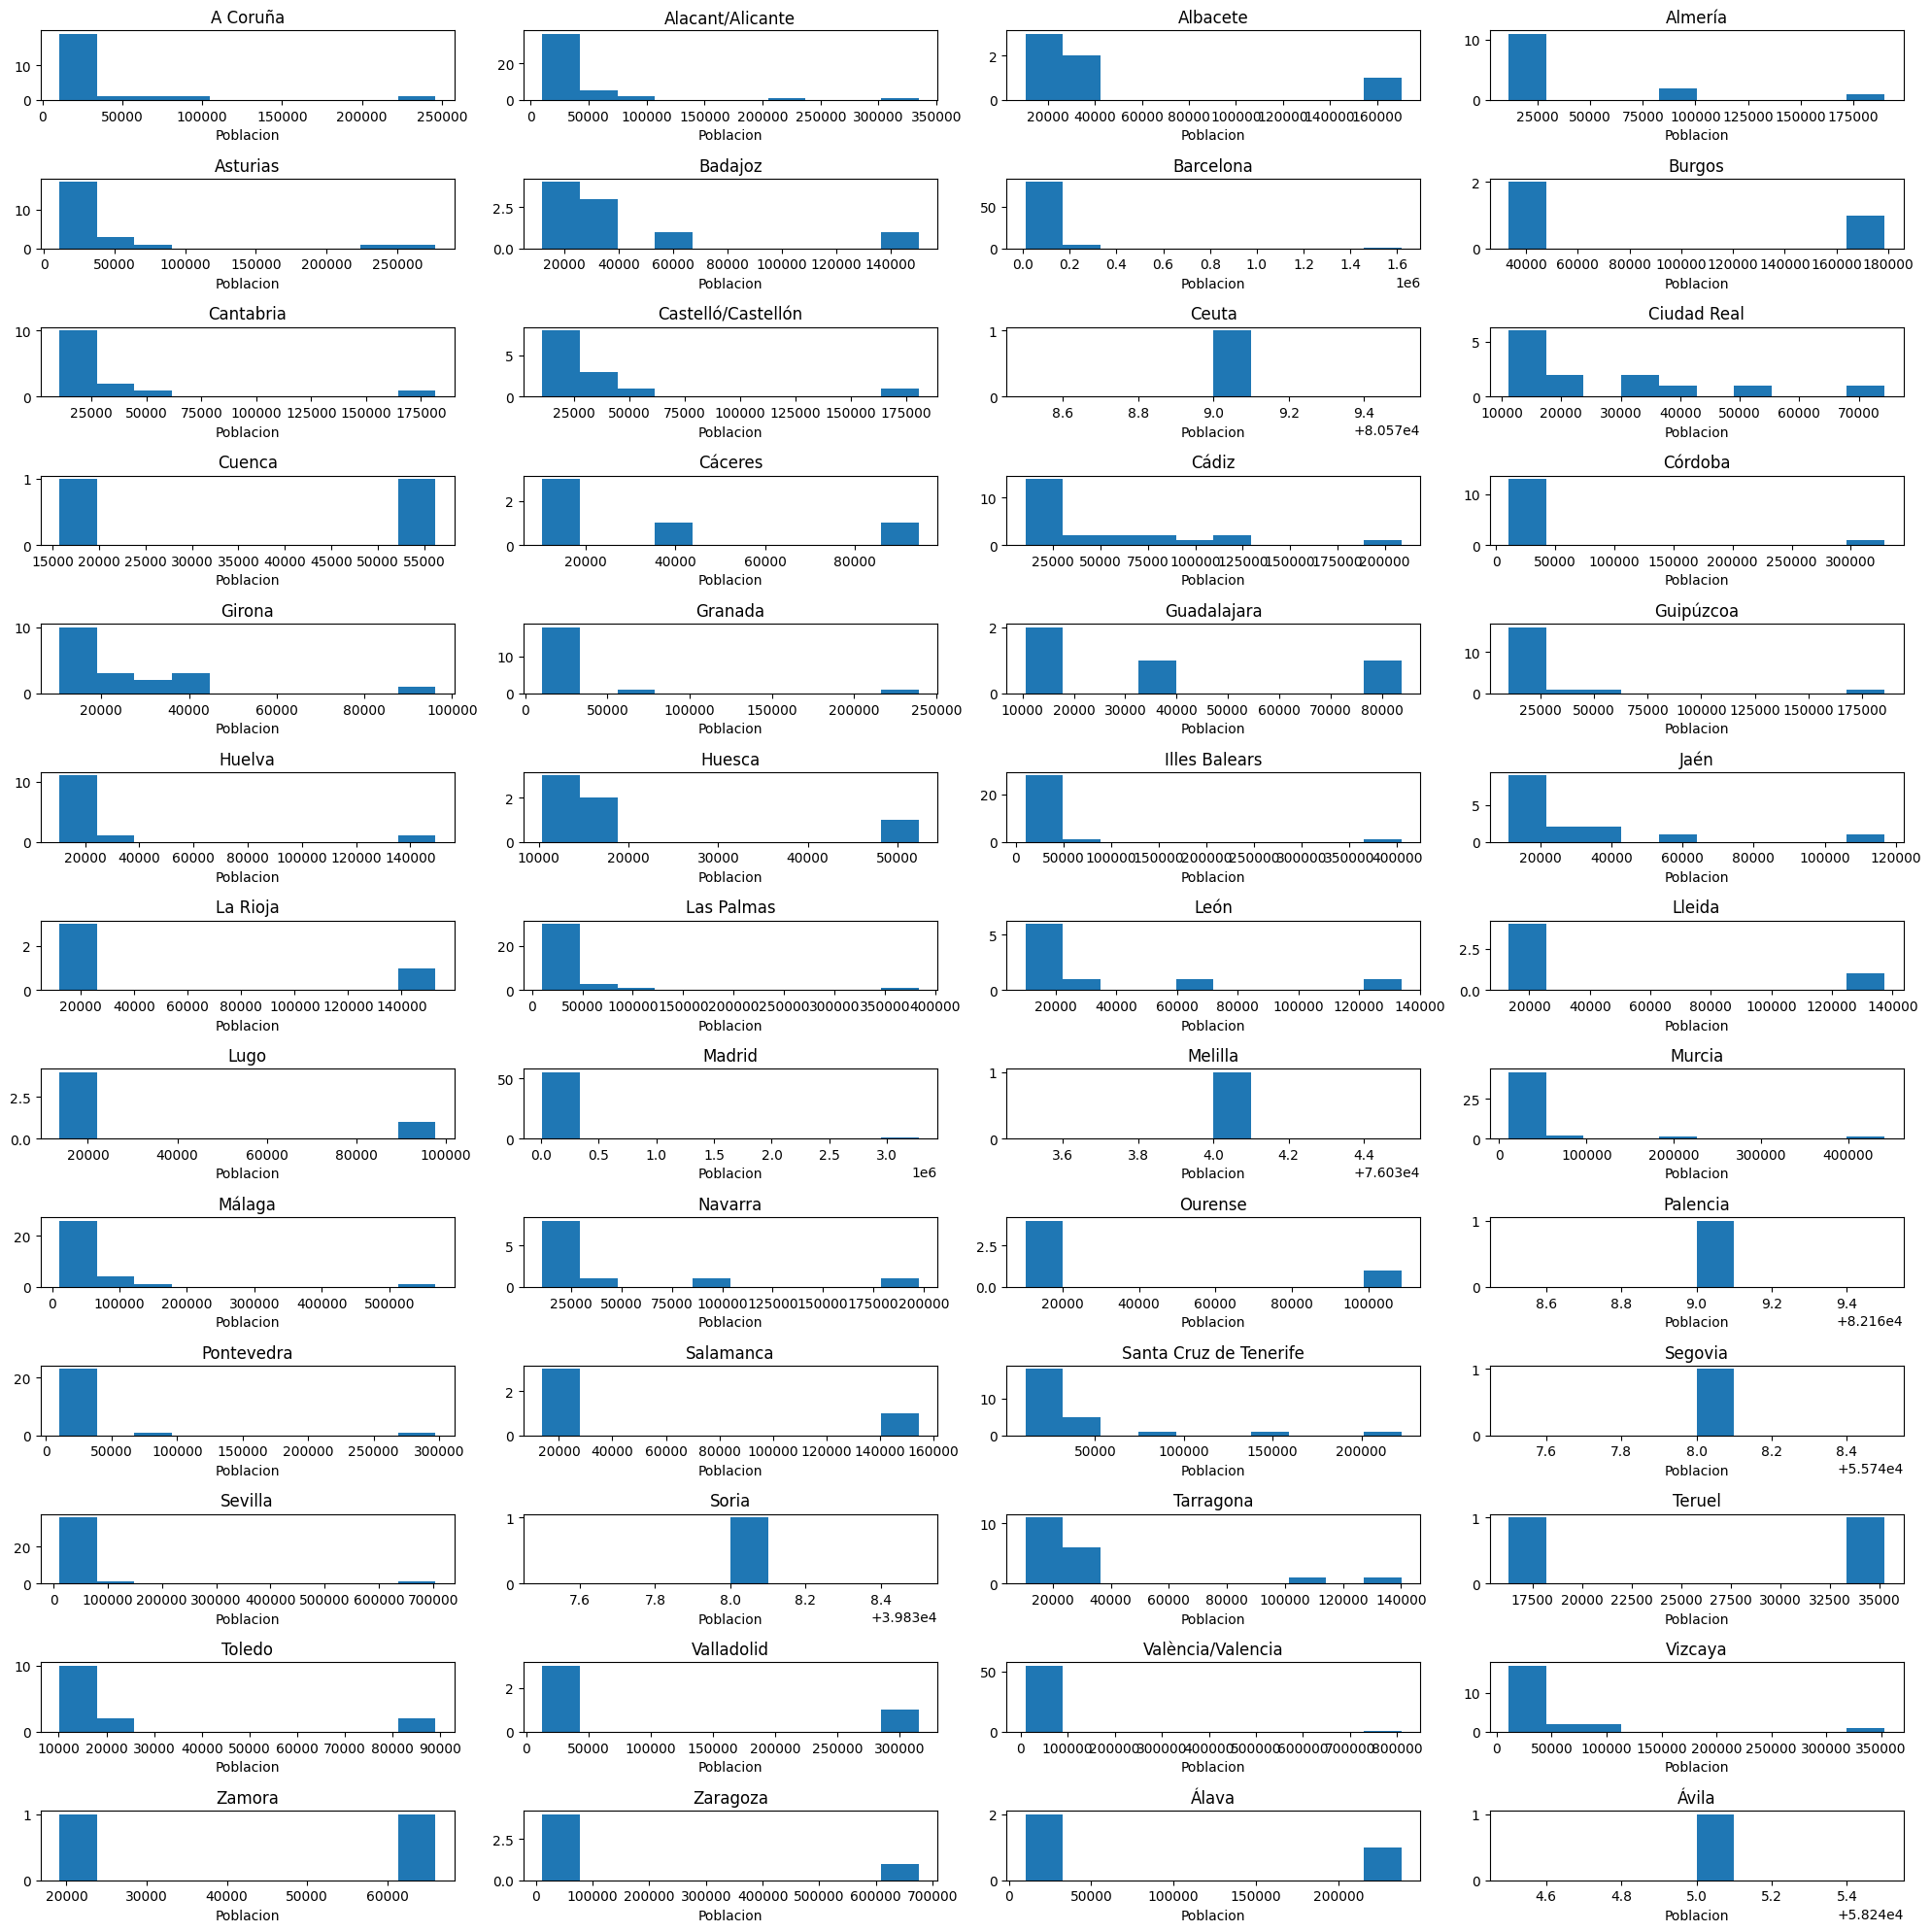

In [63]:
df.groupby('Provincia').count()

fig, axs = plt.subplots(nrows=13, ncols=4, figsize=(20, 20))

for i, (provincia,datos) in enumerate(provincias):
    fila, columna= divmod(i,4)
    axs[fila, columna].hist(datos['Poblacion'])
    axs[fila, columna].set_title(provincia)
    axs[fila, columna].set_xlabel('Poblacion')

fig.tight_layout()

plt.show()



7. Seleccione al azar cincuenta municipios diferentes de entre los diponibles en el archivo. Asegúrese de que no se repitan. ¿Luego calcule el promedio de la población y la desviación estándar de esto 50 municipios?.

In [66]:
muestra = df.sample(n=50,replace=False)
promedio= muestra['Poblacion'].mean()
desv= muestra['Poblacion'].std()
print(f"El promedio de la poblacion es de : {promedio}")
print(f"La desviacion estandar es de: {desv}")

El promedio de la poblacion es de : 31025.12
La desviacion estandar es de: 35924.585652611735
